# Data visualization with pyplot and seaborn

**References**:
+ https://matplotlib.org/stable/tutorials/pyplot.html

**Content**:
+ Matplotlib
    + figures in pyplot
    + create a new figure
    + indexing of subplots
    + adjust properties of axes
    + Working with data
+ Seaborn
    + Visualizing relational data
        + Axes-level functions & plt.subplots
        + axes-level vs. figure-level functions
        + adjusting figure size
    + Visualizing distributions
        + Using joint plot & pair plot
    + Visualizing categorical data

## Matplotlib

+ [API](https://matplotlib.org/stable/api/index.html)
+ we make use in particular of the module `pyplot` from `matplotlib` which is abbreviated by convention with `plt` when importing the module
    + import module: `import matplotlib.pyplot as plt`  
+ Matplotlib graphs your data on `Figures` which can contain
    + one or more axes, and
    + an area where data points can be specified in terms of x-y coordinates.

### Parts of a Figure
<img src="https://matplotlib.org/stable/_images/anatomy.png" width="400"/>

**Axes**
+ Artist attached to a Figure
+ contains a region for plotting data, and usually includes 2 or 3 Axis objects that provide ticks and tick labels to provide scales for the data
+ Each Axes also has
  + a title (`set_title()`),
    + an x- and y-label (`set_xlabel()`, `set_ylabel()`)

**Artist**
+ everything visible on the Figure is an Artist
+ includes Text objects, Line2D objects, collections objects, Patch objects, etc.

### Create a new figure
+ single figure:
    + `fig = plt.figure()`
    + returns a figure without subplots 
+ figure with subplots:
    + `fig, axs = plt.subplots(nrow, ncol)`
    + returns a tuple consisting of a figure and a set of axes
+ figure with subfigures that consists of subplots: 
```
fig = plt.figure()
subfigs = fig.subfigures(nrow, ncol)
subfigure0 = subfigs[0].subplots(nrow, ncol)
```

In [20]:
# import module
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

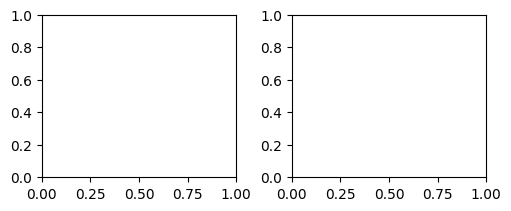

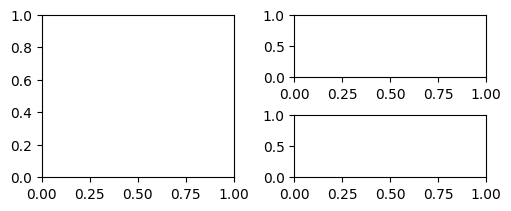

In [27]:
# create an empty figure
fig = plt.figure()

# create a figure with a two subplots arranged in 1 row and 2 columns
fig, axs = plt.subplots(1, 2, # nrow, ncol
                        figsize=(5,2),
                       constrained_layout=True) 

# create a figure with two subfigures that consists of subplots
fig = plt.figure(figsize=(5,2), constrained_layout=True)
subfigs = fig.subfigures(1,2) # row, col
subfig_left = subfigs[0].subplots(1,1)
subfig_right = subfigs[1].subplots(2,1)

### Indexing of subplots
+ numbering of subplots: the order is always `(row, col)` and we start indexing with **zero**
    + thus, in a 2x2 plot
        + the upper left plot is `axs[0,0]` (first row, first col)
        + the lower left plot is `axs[1,0]` (second row, first col)
        + etc.
    + **Note**, when we have only one row or one column, we use only scalars for indexing
        + e.g. in a 2x1 plot (two rows, one column), we call the upper subplot by `axs[0]` and the lower one by `axs[1]`  

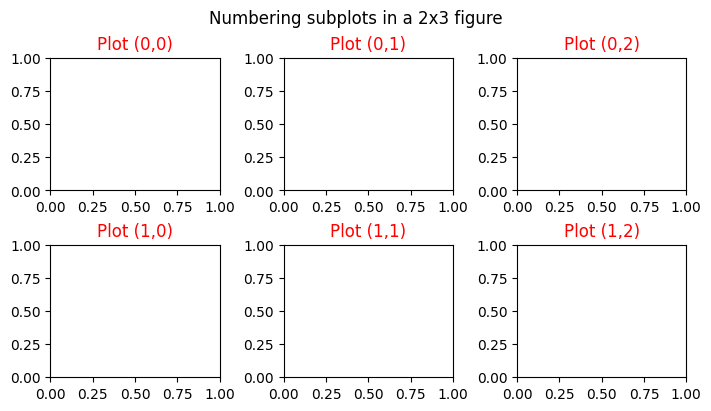

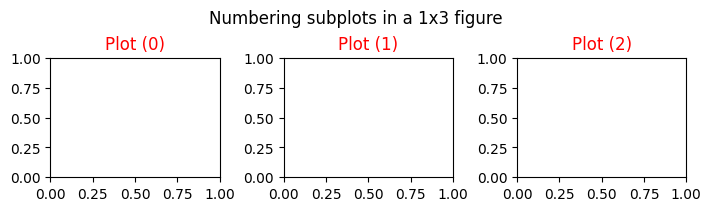

In [32]:
import itertools
# an example figure with subplots
# numbering in a 2x3 figure 
fig, axs = plt.subplots(2, 3, figsize=(7,4), constrained_layout=True)
# set titles per subplot
for i,j in itertools.product(range(2), range(3)):
    axs[i,j].set_title(label=f"Plot ({i},{j})", color="red")
fig.suptitle("Numbering subplots in a 2x3 figure")
# print only figure without further information
plt.show()

# numbering in a 1x3 figure
fig, axs = plt.subplots(1,3, figsize=(7,2), constrained_layout=True)
# set titles per subplot
[axs[i].set_title(f"Plot ({i})", color="red") for i in range(3)]
fig.suptitle("Numbering subplots in a 1x3 figure")
plt.show()

### Adjust properties of the axes
+ when we address the axes of a subplot the methods name usually starts with `set_`
+ in the following some examples:
    + `set_title`: add **title** to your plot
    + `set_xlabel`: add **label** for your **x-axis**
    + `set_ylabel`: add **label** for your **y-axis**
    + `set_xlim`: set the **limits** of your **x-axis**
    + `set_ylim`: set the **limits** of your **y-axis**
    + `set_xticks`: provide list of ticks that you want to show on your x-axis (same for yticks)
    + `set_xticklabels`: provide list of labels that your ticks should have on your x-axis (same for yticklabels)
    + `set_axis_off`: remove a subplot from the grid
+ but we can also add some text or arrows:
    + `text`: incorporate some text in your figure
    + annotated arrow:
```
annotate('text', xy=(0.5, 0.5), xytext=(0.1, 0.8),
         arrowprops=dict(facecolor='black', shrink=0.1))
```

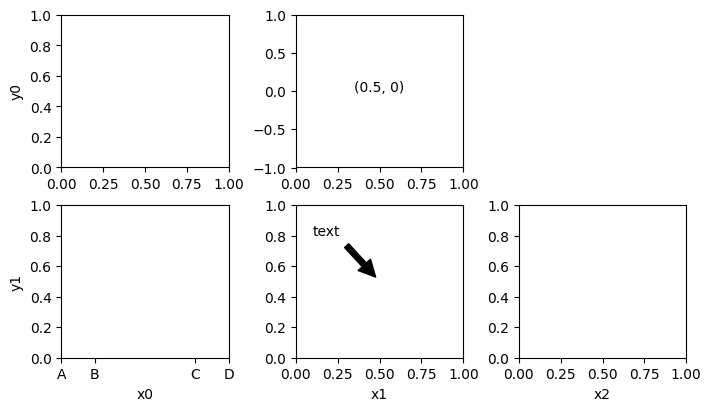

In [42]:
# an example 2x3 figure with subplots
# create 2x3 figure 
fig, axs = plt.subplots(2,3, figsize=(7,4), constrained_layout=True)
# set label for x and y axis
[axs[1,i].set_xlabel(xlabel=f"x{i}") for i in range(3)]
[axs[i,0].set_ylabel(ylabel=f"y{i}") for i in range(2)]
# remove last plot in first row
axs[0,2].set_axis_off()
# set limits of y-axis for 2nd plot in 1st row
axs[0,1].set_ylim(bottom=-1, top=1)
# modify ticks on the x-axis (1st plot 2nd row)
axs[1,0].set_xticks(ticks=[0,1,4,5])
# add new labels to modified x-ticks
axs[1,0].set_xticklabels(labels=["A","B","C","D"])
# create text 
axs[0,1].text(x=0.5, y=0, s="(0.5, 0)", ha="center")
# draw an annotated arrow
axs[1,1].annotate("text", xy=(0.5,0.5), xytext=(0.1,0.8),
                  arrowprops=dict(facecolor="black", shrink=0.1))

plt.show()

### Working with data 

+ the `plot` function takes x and y lists or arrays
+ when you provide a single list/array, pyplot assumes it is a sequence of y values, and automatically generates the x values for you
+ you can make a lot of modifications to your plot ([see API for more info](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_marker)) for example :
    + `linestyle = {'--',':','',}` : dashed, dotted, no-line
    + `linewidth = float`
    + `marker = '.', 'o', '2', 'v', ...` : point, circle, tri_up, triangle_down, etc. [see here for more info](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)
    + `markersize = float`
    + `color = {'r', 'red', Hex, RGB, ...}`: [see here for info about specifying colors](https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def)
+ it is also possible to have multiple data points in one plot (e.g., when you have a grouping variable
    + you can specify the different data sequentially in one `plot` or you use a `for`-loop 

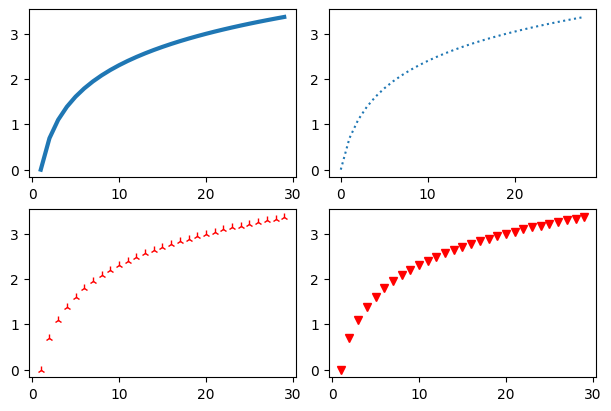

In [50]:
# import numpy
import numpy as np

# create some data for plotting
x1 = range(1,30)
y1 = np.log(x1)

# create a 2x2 figure
fig, axs = plt.subplots(2,2, figsize=(6,4), constrained_layout=True)
# provide x and y data 
axs[0,0].plot(x1, y1, linewidth=3.)
# a single data array will be interpreted as y-values, x-values will be autom. generated as a range of same length
axs[0,1].plot(y1, linestyle=":")
# change marker type, color, linestyle
axs[1,0].plot(x1, y1, marker = "2", linestyle="", color="red") 
# short notation including color (first letter) and marker type (second letter)
axs[1,1].plot(x1,y1, "rv")

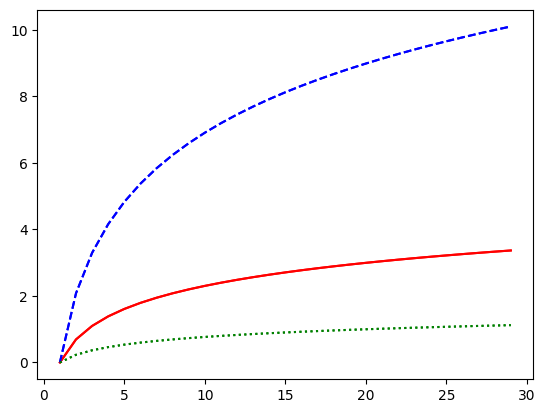

In [54]:
# create some data for plotting
x1 = range(1,30)
y1 = np.log(x1)
y2 = np.log(x1)*3
y3 = np.log(x1)/3

# multiple data in one plot
plt.plot(x1,y1, "r", x1, y2, "b--", x1, y3, "g:")

# alternative 
for x,y,m in zip([x1]*3, [y1,y2,y3], ["r", "b--","g:"]):
    plt.plot(x,y,m)
plt.show()

**Plotting with dictionnaries**
+ sofar we used lists or arrays for plotting, now we use dictionnaries

**Plotting categorical data**
+ to plot categorical data, we can also use histograms, barplots, boxplots, etc. (`plt.hist`, `plt.barplot`, `plt.boxplot`, etc.)

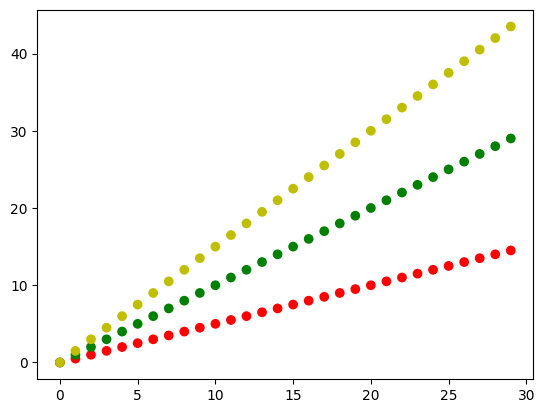

In [58]:
import pandas as pd
# generate data
# we have 3 groups (a,b,c) with 10 observations each. 
# We assume y is a linear function of x: b*x. Every group has a different 'b'
n_gr = 3
obs_gr = 10
color_gr = ["r", "g", "y"]
betas = [0.5, 1., 1.5]

# create a new dictionary with one entry
data = dict(obs = obs_gr*n_gr)
# add further entries to the dict 
data["x"] = list(range(data["obs"]))*n_gr
data["y"] = np.concatenate([np.multiply(b, range(data["obs"])) for b in betas],0)
data["col_group"] = np.repeat(color_gr, data["obs"])

# plot data
p = plt.scatter("x", "y", c="col_group", data = data)  
plt.show()

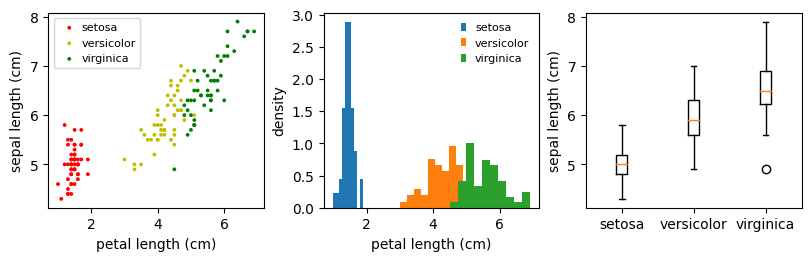

In [132]:
# another (more elaborate) example
import numpy as np
import pandas as pd
from sklearn import datasets

# load data set
d = datasets.load_iris()
# print(d)
# format dataset as DataFrame with feature names as column names
dat = pd.DataFrame(d["data"], columns = d["feature_names"])
# add info about species as column to dataframe
dat["species"] = d["target"]
# relabel values from 0,1,2 to 'setosa', 'versicolor', 'virginica'
dat["species"] = dat["species"].replace([0,1,2],d["target_names"])
# create color names for each species 
dat["species_col"] = dat["species"].replace(d["target_names"],["r","y","g"])
# show first lines of data
dat.head()

fig, ax = plt.subplots(1,3, constrained_layout = True, figsize = (8,2.5))
# create scatter plot
for loc, spec in enumerate(d["target_names"]):
    dat_filtered = dat[dat["species"] == spec]
    ax[0].scatter(x = dat_filtered["petal length (cm)"], 
                   y = dat_filtered["sepal length (cm)"],  # data
                   s = 3,                                  # size of scatter points
                   c = dat_filtered["species_col"],        # color data according to a grouping variable 
                   label = spec)                           # label data accordingly
    # create histogram
    ax[1].hist(dat_filtered["petal length (cm)"], bins = 10, label = spec, density = True)
    # create boxplot
    ax[2].boxplot(dat_filtered["sepal length (cm)"], positions = [loc])

# adjust axes and legend for scatterplot 
ax[0].legend(fontsize = 8,                 # size of label text
            markerscale = 1,               # size of handle 
            handletextpad = 0.1)           # distance between label text and handle
ax[0].set_xlabel("petal length (cm)")      # set labels of x and y-axis
ax[0].set_ylabel("sepal length (cm)")

# adjust axes and legend for scatterplot 
ax[1].legend(fontsize = 8, markerscale = 0.5, frameon=False, handlelength=0.5)
ax[1].set_xlabel("petal length (cm)")
ax[1].set_ylabel("density")

# adjust axes and legend for boxplot 
ax[2].set_xticklabels(labels = d["target_names"])
ax[2].set_ylabel("sepal length (cm)")
plt.show()

## Seaborn
+ you can find the [API here](https://seaborn.pydata.org/api.html)
+ by convention seaborn is imported via: `import seaborn as sns`
+ seaborn is a library for making statistical graphics in Python which builds on top of matplotlib
+ the code in seaborn is **hierarchically structured**. We can differentiate between
   + **modules** that achieve similar visualization goals (distributions, relations, categorical)
   + **functions** within a module that share a lot of underlying code and offer module specific features
       + **axes-level functions** plot data onto a single `matplotlib.pyplot.Axes` object, which is the return value of the function.
       + **figure-level functions** interface with matplotlib through a seaborn object, usually a `FacetGrid`, that manages the figure
+ Each module has a single figure-level function, which offers a unitary interface to its various axes-level functions:

<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png" width="500"/>

### Visualizing relational data
+ module: **relational**
+ single figure-level function: `relplot`
+ multiple axes-level functions:
    + `scatterplot`
    + `lineplot` 

In [59]:
# import seaborn and pyplot
import seaborn as sns
import matplotlib.pyplot as plt

# load and inspect first rows of example dataset
d2 = sns.load_dataset("tips")
d2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


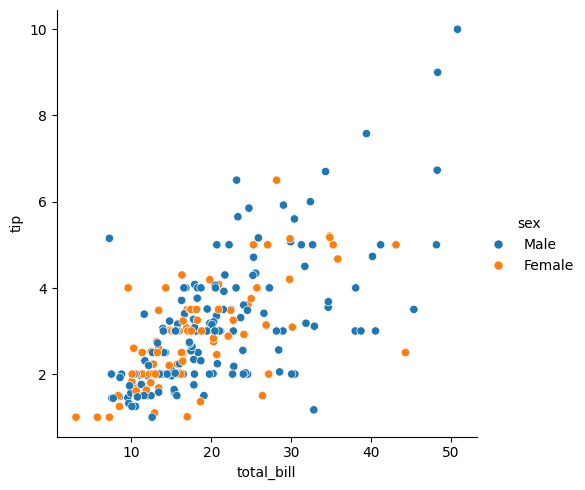

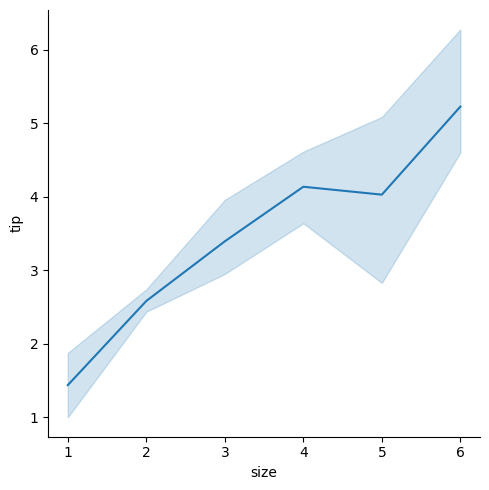

In [62]:
# figure-level function with scatterplot on the axes-level
sns.relplot(data=d2, 
            kind="scatter",
            x = "total_bill", y = "tip",
            hue = "sex"
           )

# figure-level function with lineplot on the axes-level
# By default, the resulting plot shows the mean and 95% CI for each unit
sns.relplot(data = d2,
           kind="line",
           x = "size", y = "tip")


### Axes-level functions & plt.subplots
+ you can also call the axes-level functions directly and include them for example in `plt.subplots`
+ this gives you greate flexibility of creating your plot as you want it to have
+ each axes-level function has a `ax` argument which you can use the specify on which axes (i.e., subplot) the plot should appear

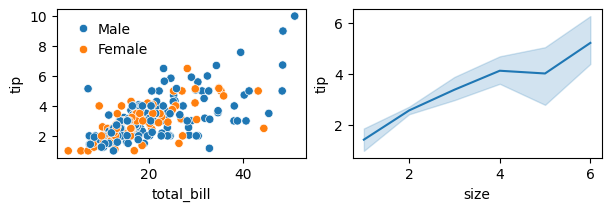

In [64]:
# using axes-level functions in plt.subplots
fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(6,2))
# left plot: scatterplot tip vs. total-bill grouped by gender
sns.scatterplot(data = d2, x = "total_bill", y = "tip", hue = "sex", ax = axs[0])
# right plot: lineplot tip vs. size
sns.lineplot(data=d2, x = "size", y= "tip", ax = axs[1])
axs[0].legend(title=None, frameon = False, handletextpad=0.05)
plt.show()

### Differences between axes-level and figure-level functions 
+ figure-level plots look mostly like their axes-level counterparts, except of:
    + legend (placed outside the plot for figure-level plots)
    + subplots (figure-level functions can create figures with multiple subplots)
    + combining different kinds of plots (better with axes-level functions)
+ figure-level functions
   + cannot (easily) be composed with other plots
   + return a FacetGrid instance, which has a few methods for customizing attributes of the plot 

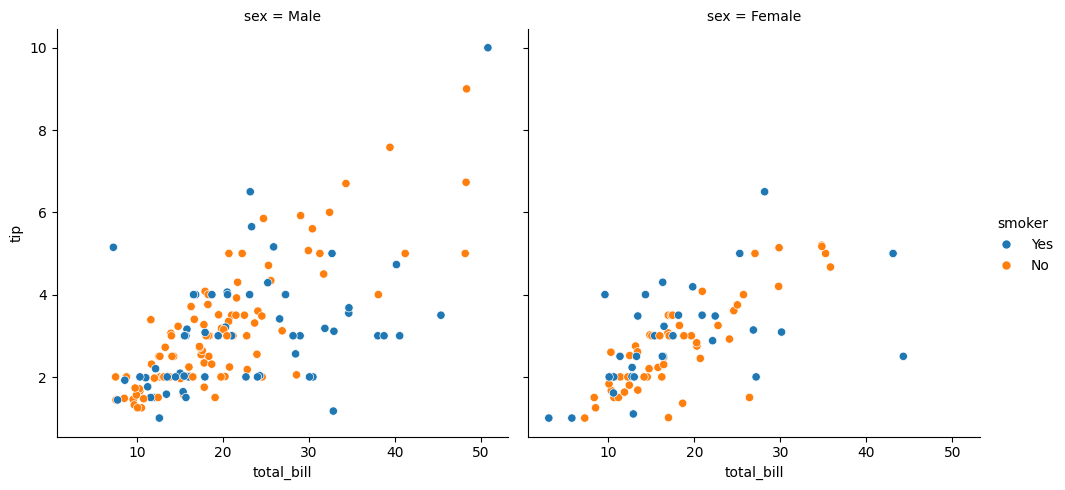

In [65]:
# create two subplots for female and male
sns.relplot(data=d2, kind = "scatter",
            x = "total_bill", y = "tip",
            col = "sex", hue="smoker"
           )

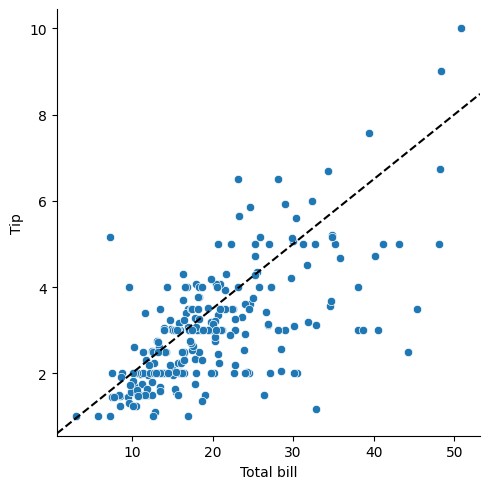

In [67]:
# create a relational plot (figure-level function)
# and save it as a new object (default type is scatterplot)
g = sns.relplot(data = d2, x = "total_bill", y = "tip")
# use the new object to access the matplotlib axes 
# draw a diagonal line
g.ax.axline(xy1=(10,2), slope=.15, color="black", linestyle="--")
# modify x- and y-label
g.set_axis_labels("Total bill", "Tip")

### Specifying the figure size

+ axes-level function
    + `figsize()`
    + `set_size_inches()`
+ figure-level function:
    + have own parameters to control the size
    + parameters correspond to the size of each subplot, rather than the size of the overall figure

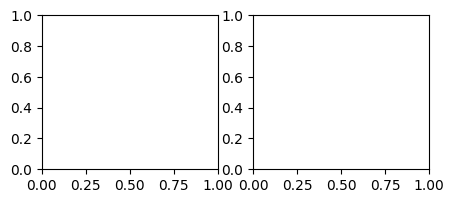

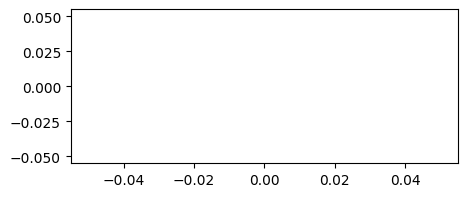

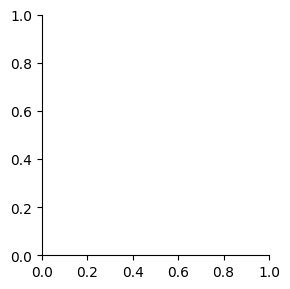

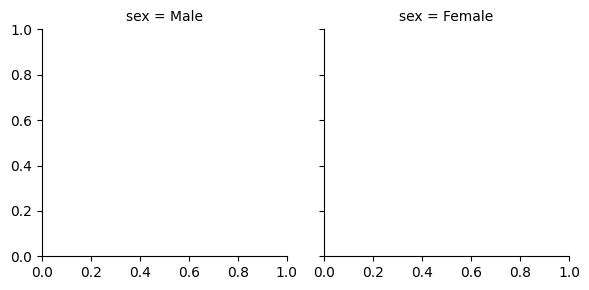

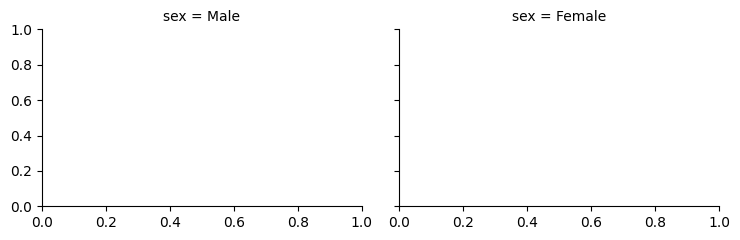

In [70]:
# subplots
fig, axs = plt.subplots(1,2, figsize=(5,2))

# figure
fig2 = plt.figure()
plt.plot()
fig2.set_size_inches((5,2))

# figure-level function: 
g = sns.FacetGrid(d2)
g = sns.FacetGrid(d2, col = "sex")
g = sns.FacetGrid(d2, col = "sex", height=2.5, aspect=1.5)

### Visualizing distributions

+ often we want to investigate the distribution of variables in our data set
+ module: **distributional**
+ figure-level function: `displot()`, `jointplot()`, `pairplot()`
+ axes-level functions:
    + `histplot()`
    + `kdeplot()`
    + `ecdfplot()`
    + `rugplot()`

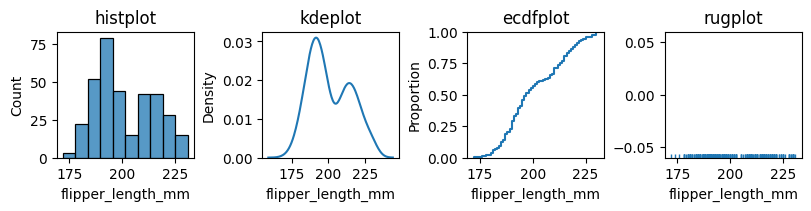

In [73]:
# load example data set
penguins = sns.load_dataset("penguins")
penguins.head()

# overview of the different axes-level functions using the penguin data
fig, axs = plt.subplots(1,4, constrained_layout=True, figsize=(8,2))
for i, p in enumerate([sns.histplot, sns.kdeplot, sns.ecdfplot, sns.rugplot]):
    p(penguins["flipper_length_mm"], ax = axs[i])
    axs[i].set_title(p.__name__)

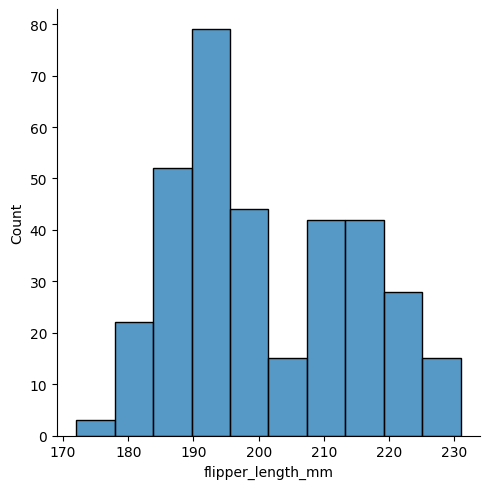

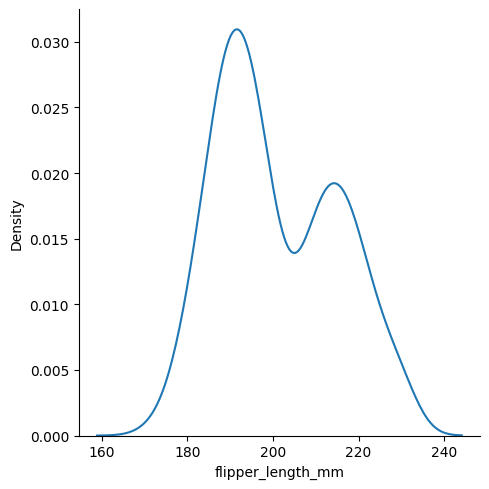

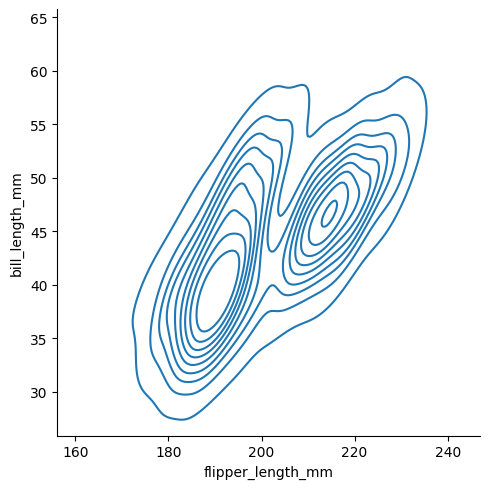

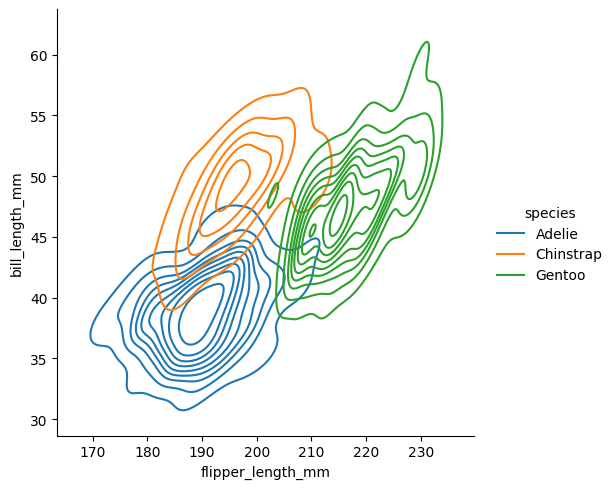

In [80]:
# example for figure-level displot
# default is histogram (kind='hist')
sns.displot(data = penguins, x = "flipper_length_mm")
# change axes-level function through `kind`
sns.displot(data = penguins, x = "flipper_length_mm", kind="kde")
# add second variable (try: kind="kde")
sns.displot(data = penguins, x = "flipper_length_mm", y = "bill_length_mm", kind="kde")
# add third variable
sns.displot(data = penguins, x = "flipper_length_mm", y = "bill_length_mm", hue="species", kind="kde")

#### Using `jointplot` and `pairplot`
+ `jointplot` and `pairplot` employ multiple kinds of plots from different modules to represent multiple aspects of a dataset in a single figure
+ Both are figure-level functions and create figures with multiple subplots by default.
+ But they use different objects to manage the figure: `JointGrid` and `PairGrid`, respectively.

**`jointplot`**: plots the relationship or joint distribution of two variables while adding marginal axes that show the univariate distribution of each one separately

**`pairplot`**: combines joint and marginal views; rather than focusing on a single relationship, it visualizes every pairwise combination of variables simultaneously

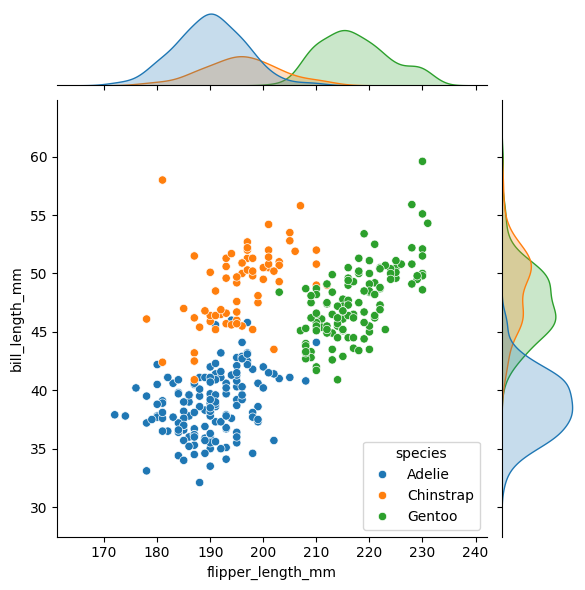

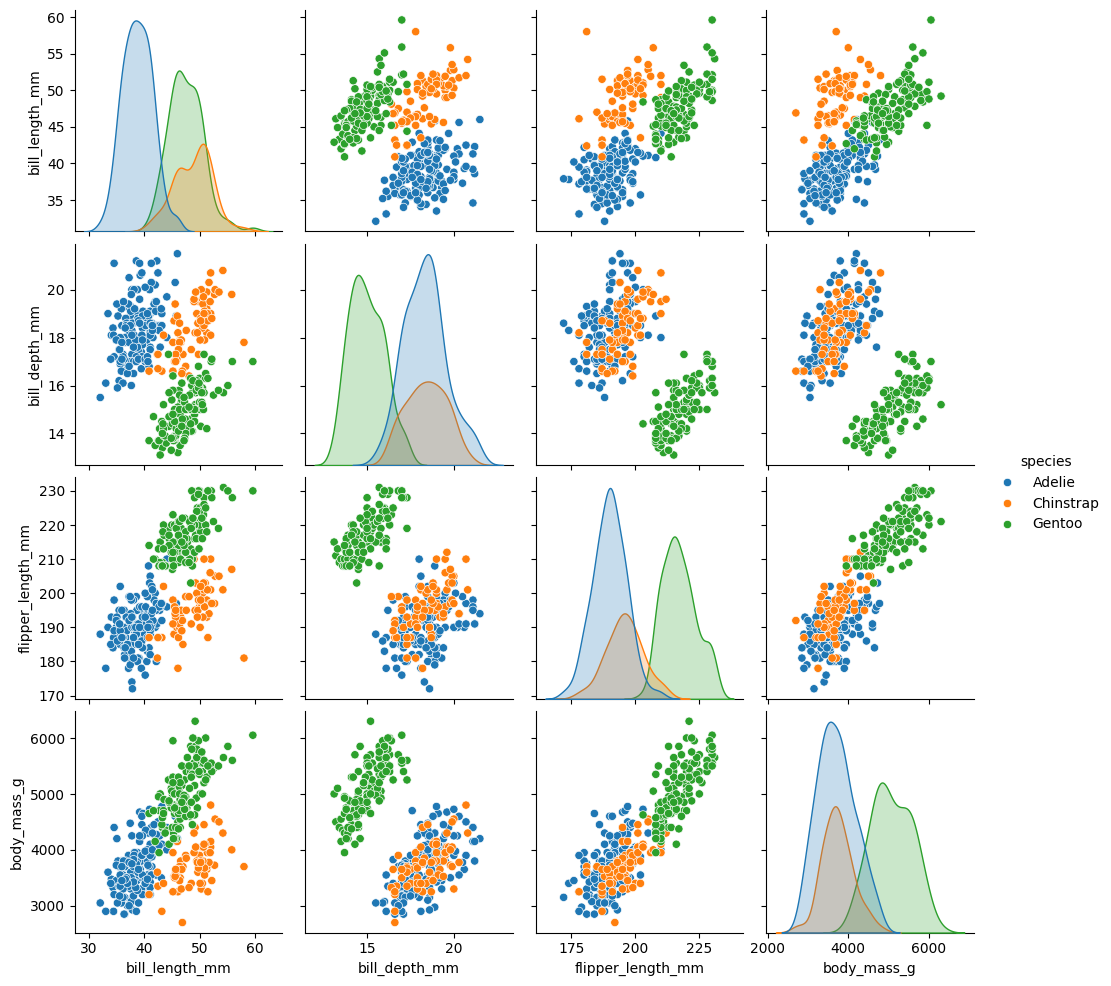

In [82]:
# joint plot
sns.jointplot(data=penguins, x ="flipper_length_mm", y = "bill_length_mm", hue="species")

# pairplot
sns.pairplot(data=penguins, hue="species")

### Visualizing categorical data
+ module: **categorical**
+ figure-level function: `catplot()`
+ axes-level functions:
    + Categorical scatterplots:
        + stripplot() (with kind="strip"; the default)
        + swarmplot() (with kind="swarm")
    + Categorical distribution plots:
        + boxplot() (with kind="box")
        + violinplot() (with kind="violin")
        + boxenplot() (with kind="boxen")
    + Categorical estimate plots:
        + pointplot() (with kind="point")
        + barplot() (with kind="bar")
        + countplot() (with kind="count")

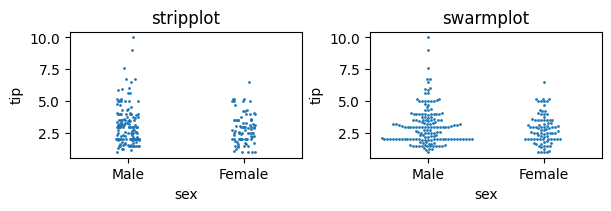

In [84]:
# categorical scatterplot (note: size argument)
fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(6,2))
for i, p in enumerate([sns.stripplot, sns.swarmplot]):
    p(data=d2, x = "sex", y = "tip", ax=axs[i], size=2)
    axs[i].set_title(p.__name__)

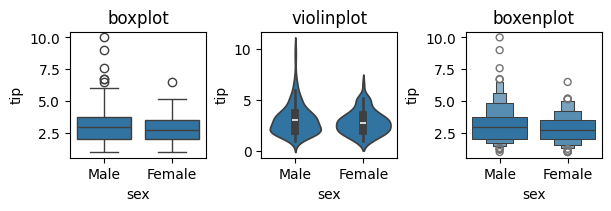

In [85]:
# categorical distributions 
fig, axs = plt.subplots(1,3, constrained_layout=True, figsize=(6,2))
for i, p in enumerate([sns.boxplot, sns.violinplot, sns.boxenplot]):
    p(data=d2, x = "sex", y = "tip", ax=axs[i])
    axs[i].set_title(p.__name__)

Text(0.5, 1.0, 'countplot')

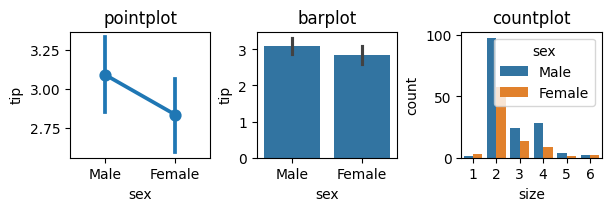

In [86]:
# categorical estimate plot 
fig, axs = plt.subplots(1,3, constrained_layout=True, figsize=(6,2))
for i, p in enumerate([sns.pointplot, sns.barplot]):
    p(data=d2, x = "sex", y = "tip", ax=axs[i])
    axs[i].set_title(p.__name__)
sns.countplot(data=d2, x="size", hue="sex", ax=axs[-1])
axs[-1].set_title("countplot")